# Thay đổi không gian màu

In [2]:
import cv2 as cv
flags = [i for i in dir(cv) if i.startswith('COLOR_')]
print( flags )

['COLOR_BAYER_BG2BGR', 'COLOR_BAYER_BG2BGRA', 'COLOR_BAYER_BG2BGR_EA', 'COLOR_BAYER_BG2BGR_VNG', 'COLOR_BAYER_BG2GRAY', 'COLOR_BAYER_BG2RGB', 'COLOR_BAYER_BG2RGBA', 'COLOR_BAYER_BG2RGB_EA', 'COLOR_BAYER_BG2RGB_VNG', 'COLOR_BAYER_BGGR2BGR', 'COLOR_BAYER_BGGR2BGRA', 'COLOR_BAYER_BGGR2BGR_EA', 'COLOR_BAYER_BGGR2BGR_VNG', 'COLOR_BAYER_BGGR2GRAY', 'COLOR_BAYER_BGGR2RGB', 'COLOR_BAYER_BGGR2RGBA', 'COLOR_BAYER_BGGR2RGB_EA', 'COLOR_BAYER_BGGR2RGB_VNG', 'COLOR_BAYER_GB2BGR', 'COLOR_BAYER_GB2BGRA', 'COLOR_BAYER_GB2BGR_EA', 'COLOR_BAYER_GB2BGR_VNG', 'COLOR_BAYER_GB2GRAY', 'COLOR_BAYER_GB2RGB', 'COLOR_BAYER_GB2RGBA', 'COLOR_BAYER_GB2RGB_EA', 'COLOR_BAYER_GB2RGB_VNG', 'COLOR_BAYER_GBRG2BGR', 'COLOR_BAYER_GBRG2BGRA', 'COLOR_BAYER_GBRG2BGR_EA', 'COLOR_BAYER_GBRG2BGR_VNG', 'COLOR_BAYER_GBRG2GRAY', 'COLOR_BAYER_GBRG2RGB', 'COLOR_BAYER_GBRG2RGBA', 'COLOR_BAYER_GBRG2RGB_EA', 'COLOR_BAYER_GBRG2RGB_VNG', 'COLOR_BAYER_GR2BGR', 'COLOR_BAYER_GR2BGRA', 'COLOR_BAYER_GR2BGR_EA', 'COLOR_BAYER_GR2BGR_VNG', 'COLOR_

In [2]:
import cv2 as cv
import numpy as np
 
cap = cv.VideoCapture(0)
 
while(1):
 
    # Take each frame
    _, frame = cap.read()
 
    # Convert BGR to HSV
    hsv = cv.cvtColor(frame, cv.COLOR_BGR2HSV)
 
    # # define range of blue color in HSV
    # lower_red = np.array([50,50,110])
    # upper_red = np.array([255,255,130])
 
    # # Threshold the HSV image to get only blue colors
    # mask = cv.inRange(hsv, lower_red, upper_red)
 
    # define range of blue color in HSV
    lower = np.array([50,50,0])
    upper = np.array([255,255,255])
 
    # Threshold the HSV image to get only blue colors
    mask = cv.inRange(hsv, lower, upper)
    # Bitwise-AND mask and original image
    res = cv.bitwise_and(frame,frame, mask= mask)
 
    cv.imshow('frame',frame)
    cv.imshow('mask',mask)
    cv.imshow('res',res)
    k = cv.waitKey(5) & 0xFF
    if k == 27:
        break
 
cv.destroyAllWindows()

KeyboardInterrupt: 

In [4]:
cap.release()
cv.destroyAllWindows()


In [6]:
red = np.uint8([[[0,255,0 ]]])
hsv_red = cv.cvtColor(red,cv.COLOR_BGR2HSV)
print( hsv_red )

[[[ 60 255 255]]]


# Geometric Transformations of Images

cv.INTER_AREA: Phù hợp khi thu nhỏ ảnh.

cv.INTER_CUBIC và cv.INTER_LINEAR: Thích hợp khi phóng to ảnh.

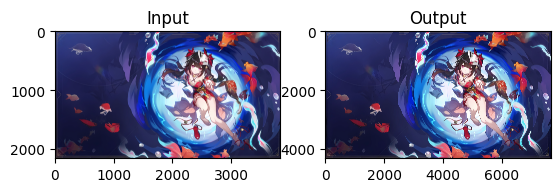

In [12]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

 
img = cv.imread('img.png')
assert img is not None, "file could not be read, check with os.path.exists()"
 
# Chuyển đổi ảnh từ BGR sang RGB
img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)

# Resize ảnh
res1 = cv.resize(img, None, fx=2, fy=2, interpolation=cv.INTER_CUBIC)

# Chuyển đổi ảnh đã resize sang RGB nếu cần hiển thị
res1_rgb = cv.cvtColor(res1, cv.COLOR_BGR2RGB)

# Hiển thị ảnh gốc và ảnh đã resize
plt.subplot(121), plt.imshow(img_rgb), plt.title('Input')
plt.subplot(122), plt.imshow(res1_rgb), plt.title('Output')
plt.show()


2160 3840
2160 3840


(<Axes: title={'center': 'Output'}>,
 Text(0.5, 1.0, 'Output'))

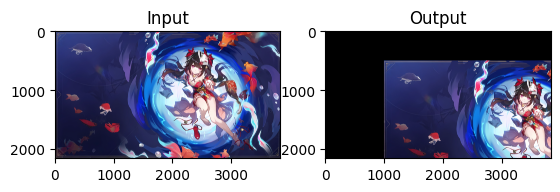

In [21]:
import numpy as np
import cv2 as cv
 
img = cv.imread('img.png', cv.IMREAD_COLOR)
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

assert img is not None, "file could not be read, check with os.path.exists()"
rows,cols,_ = img.shape

print(rows, cols)

 
M = np.float32([[1,0,1000],[0,1,500]])
dst = cv.warpAffine(img,M,(cols,rows))

rows,cols,_ = dst.shape

print(rows, cols)

# Hiển thị ảnh gốc và ảnh đã resize
plt.subplot(121), plt.imshow(img), plt.title('Input')
plt.subplot(122), plt.imshow(dst), plt.title('Output')

(<Axes: title={'center': 'Output'}>,
 Text(0.5, 1.0, 'Output'))

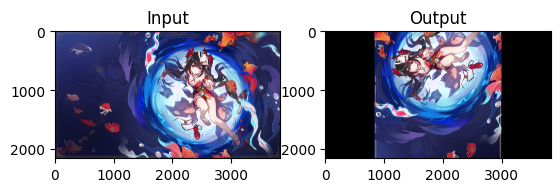

In [24]:
import cv2 as cv
import numpy as np

# Đọc ảnh
img = cv.imread('img.png', cv.IMREAD_COLOR)
assert img is not None, "file could not be read, check with os.path.exists()"
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

rows, cols, _ = img.shape

# Tạo ma trận xoay quanh tâm ảnh với góc 90 độ
M = cv.getRotationMatrix2D(((cols-1)/2.0, (rows-1)/2.0), 90, 1)
dst = cv.warpAffine(img, M, (cols, rows))

# Hiển thị ảnh gốc và ảnh đã resize
plt.subplot(121), plt.imshow(img), plt.title('Input')
plt.subplot(122), plt.imshow(dst), plt.title('Output')

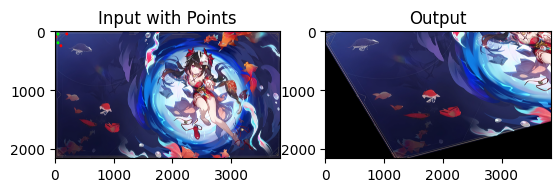

In [30]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Đọc ảnh
img = cv.imread('img.png')
assert img is not None, "file could not be read, check with os.path.exists()"
rows, cols, ch = img.shape

# Điểm cho phép biến đổi affine
pts1 = np.float32([[50, 50], [200, 50], [50, 200]])
pts2 = np.float32([[10, 100], [200, 50], [100, 250]])

# Vẽ các điểm trên ảnh gốc


# Ma trận biến đổi affine
M = cv.getAffineTransform(pts1, pts2)

# Áp dụng biến đổi affine
dst = cv.warpAffine(img, M, (cols, rows))

for pt in pts1:
    cv.circle(img, (int(pt[0]), int(pt[1])), 25, (0, 255, 0), -1)  # Vẽ các điểm bằng màu xanh lá

for pt in pts2:
    cv.circle(img, (int(pt[0]), int(pt[1])), 25, (0, 0, 255), -1)  # Vẽ các điểm bằng màu xanh lá

# Hiển thị ảnh
plt.subplot(121), plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB)), plt.title('Input with Points')
plt.subplot(122), plt.imshow(cv.cvtColor(dst, cv.COLOR_BGR2RGB)), plt.title('Output')
plt.show()


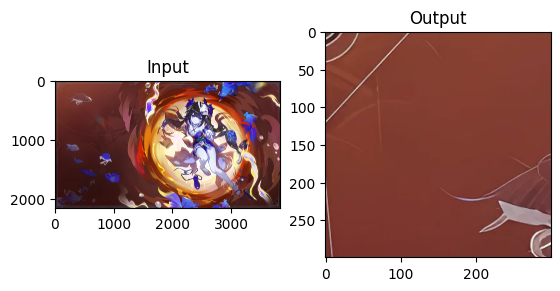

In [38]:
img = cv.imread('img.png')
assert img is not None, "file could not be read, check with os.path.exists()"
rows,cols,ch = img.shape
 
pts1 = np.float32([[56,65],[368,52],[28,387],[389,390]])
pts2 = np.float32([[0,0],[300,0],[0,300],[300,300]])
 
M = cv.getPerspectiveTransform(pts1,pts2)
 
dst = cv.warpPerspective(img,M,(300,300))
 
 
plt.subplot(121),plt.imshow(img),plt.title('Input')
plt.subplot(122),plt.imshow(dst),plt.title('Output')
plt.show()